In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
# 데이터 불러오기
iris = load_iris()
 
#dataframe으로 변경
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
 
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# dataframe 형태의 데이터를 array로 scaler 하여 변경
# 해당 방식이 싫다면 이 코드를 생략한 후 plt.scatter() 에서 dataframe 데이터를 이용할 때 .iloc을 붙여주면 된다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# K-Means k=3

In [4]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=0)
labels_3 = kmeans_3.fit_predict(iris_scaled)

centroids_3 = kmeans_3.cluster_centers_ # 두 개의 점의 중심점
labels_3[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

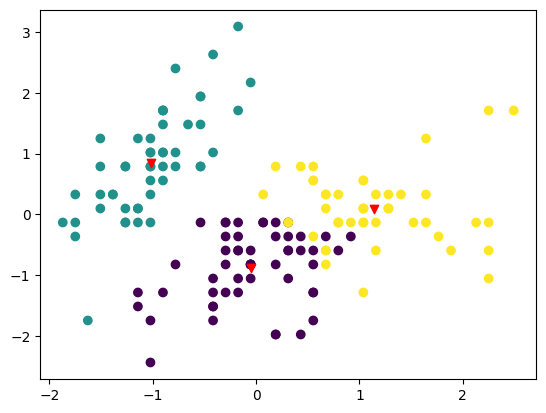

In [5]:
import matplotlib.pyplot as plt

plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels_3)
# 중심점
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='red', marker='v')

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
# 전체 실루엣 점수 평균 계산
silhouette_avg = silhouette_score(iris_scaled, labels_3)
silhouette_avg
 

np.float64(0.45994823920518635)

In [7]:
# 개별 실루엣 점수
sample_silhouette_values = silhouette_samples(iris_scaled, labels_3)
sample_silhouette_values[:10]

array([0.73419485, 0.56827391, 0.67754724, 0.62050159, 0.72847412,
       0.60988485, 0.69838355, 0.73081691, 0.48821004, 0.63154089])

In [8]:
# 클러스터별 평균 실루엣 점수 계산
unique_labels = set(labels_3)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_3 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)

In [9]:
# 결과 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')

Cluster 0: Average Silhouette Score = 0.39337721055814295
Cluster 1: Average Silhouette Score = 0.6363161744392947
Cluster 2: Average Silhouette Score = 0.3473922340262053


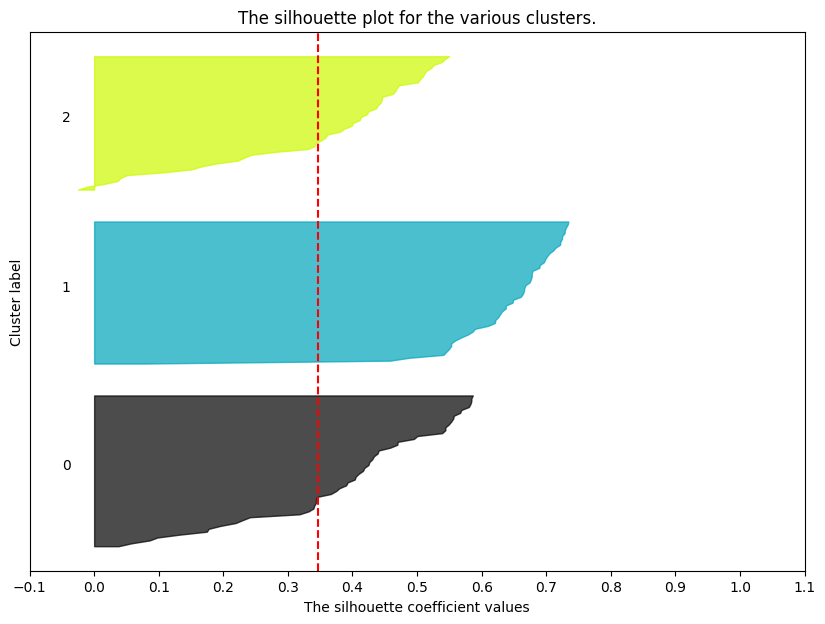

In [10]:
# 실루엣 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 7))
 
y_lower = 10
for i in range(3): #클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[labels_3 == i]
    ith_cluster_silhouette_values.sort()
   
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
 
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
 
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
    y_lower = y_upper + 10  # 다음 클러스터로 이동
 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
 
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))
 
plt.show()

# K-Means k=2

In [11]:
kmeans_2 = KMeans(n_clusters=2, random_state=0)
labels_2 = kmeans_2.fit_predict(iris_scaled)

centroids_2 = kmeans_2.cluster_centers_ # 두 개의 점의 중심점

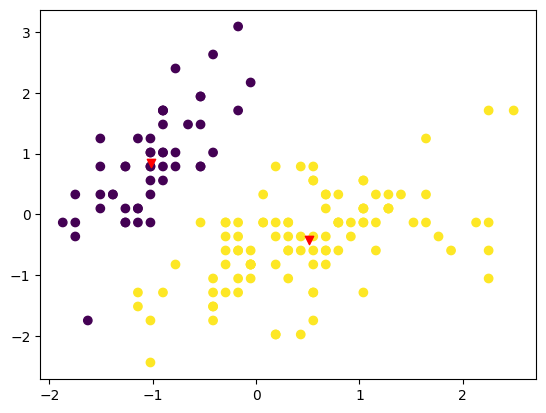

In [12]:
import matplotlib.pyplot as plt

plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c=labels_2)
# 중심점
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='red', marker='v')

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
# 전체 실루엣 점수 평균 계산
silhouette_avg = silhouette_score(iris_scaled, labels_2)
silhouette_avg

# 개별 실루엣 점수
sample_silhouette_values = silhouette_samples(iris_scaled, labels_2)
sample_silhouette_values[:10]

array([0.76336191, 0.64597357, 0.72699413, 0.68424397, 0.75529688,
       0.62887739, 0.73781704, 0.76482926, 0.58233316, 0.69258494])

In [14]:
# 클러스터별 평균 실루엣 점수 계산
unique_labels = set(labels_2)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_2 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)

# 결과 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')

Cluster 0: Average Silhouette Score = 0.6807337356696789
Cluster 1: Average Silhouette Score = 0.5322582059625817


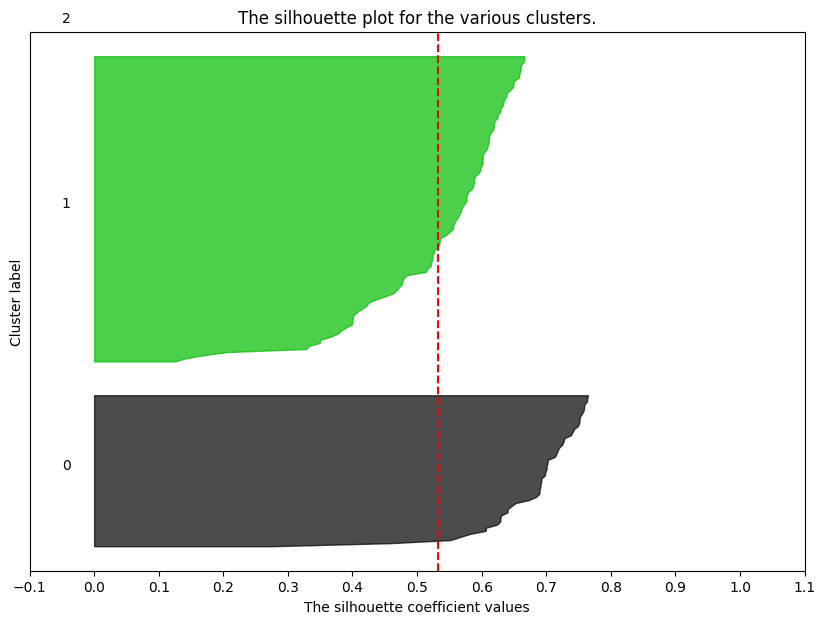

In [15]:
# 실루엣 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 7))
 
y_lower = 10
for i in range(3): #클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[labels_2 == i]
    ith_cluster_silhouette_values.sort()
   
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
 
    color = plt.cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
 
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
    y_lower = y_upper + 10  # 다음 클러스터로 이동
 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
 
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))
 
plt.show()

# PCA 분석

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pcomponents = pca.fit_transform(iris_scaled)
pcomponents

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

In [17]:
exp_v = pca.explained_variance_
exp_v

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [18]:
exp_vratio = pca.explained_variance_ratio_
exp_vratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [19]:
exp_v.cumsum()

array([2.93808505, 3.85824995, 4.00599178, 4.02684564])

In [20]:
exp_vratio.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

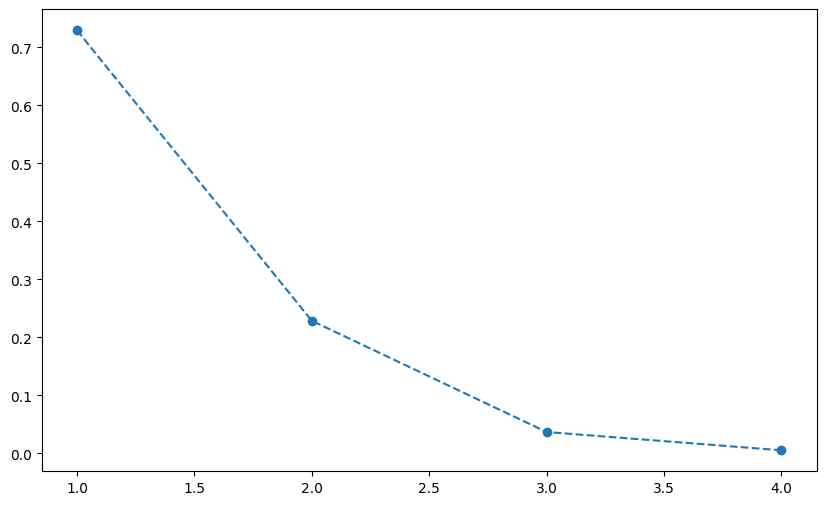

In [21]:
# 스크리 차트

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(exp_vratio)+1), exp_vratio, marker='o', linestyle='--')

In [22]:
pca2 = PCA(n_components=2)
p_comp2 = pca2.fit_transform(iris_scaled)
p_comp2_df = pd.DataFrame(data=p_comp2, columns=['PC1', 'PC2'])
p_comp2_df

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [23]:
iris_df['species'] = iris.target

In [24]:
final_df = pd.concat([p_comp2_df, iris_df[['species']]], axis=1)
final_df

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


# k-means, k=3인 모형을 만들고, 실루엣 계수를 평가합니다.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

k_means = [3, 2]

for k in k_means:
    # K-평균 클러스터링 수행
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(final_df[['PC1', 'PC2']])
    #cluster_labels[:10]

    from sklearn.metrics import silhouette_samples, silhouette_score

    # 실루엣 점수 계산
    silhouette_values = silhouette_samples(final_df[['PC1', 'PC2']], cluster_labels)
    #silhouette_values[:10]

    s_score = silhouette_score(final_df[['PC1', 'PC2']], cluster_labels)
    print(f'k={k}, silhouette_score: {s_score}')

k=3, silhouette_score: 0.5091683341538227
k=2, silhouette_score: 0.6145202036230452


In [26]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=0)
labels_3 = kmeans_3.fit_predict(final_df)

centroids_3 = kmeans_3.cluster_centers_ # 두 개의 점의 중심점
labels_3[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

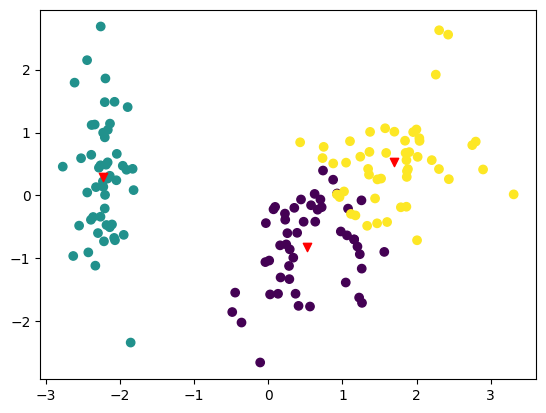

In [27]:
import matplotlib.pyplot as plt

plt.scatter(final_df.iloc[:, 0], final_df.iloc[:, 1], c=labels_3)
# 중심점
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='red', marker='v')

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
 
# 전체 실루엣 점수 평균 계산
silhouette_avg = silhouette_score(final_df, labels_3)

# 개별 실루엣 점수
sample_silhouette_values = silhouette_samples(final_df, labels_3)

# 클러스터별 평균 실루엣 점수 계산
unique_labels = set(labels_3)
silhouette_avg_per_cluster = {}
for label in unique_labels:
    cluster_silhouette_values = sample_silhouette_values[labels_3 == label]
    silhouette_avg_per_cluster[label] = np.mean(cluster_silhouette_values)

# 결과 출력
for label, silhouette_avg in silhouette_avg_per_cluster.items():
    print(f'Cluster {label}: Average Silhouette Score = {silhouette_avg}')

Cluster 0: Average Silhouette Score = 0.4264687314998217
Cluster 1: Average Silhouette Score = 0.6733833442489388
Cluster 2: Average Silhouette Score = 0.4061575049669075


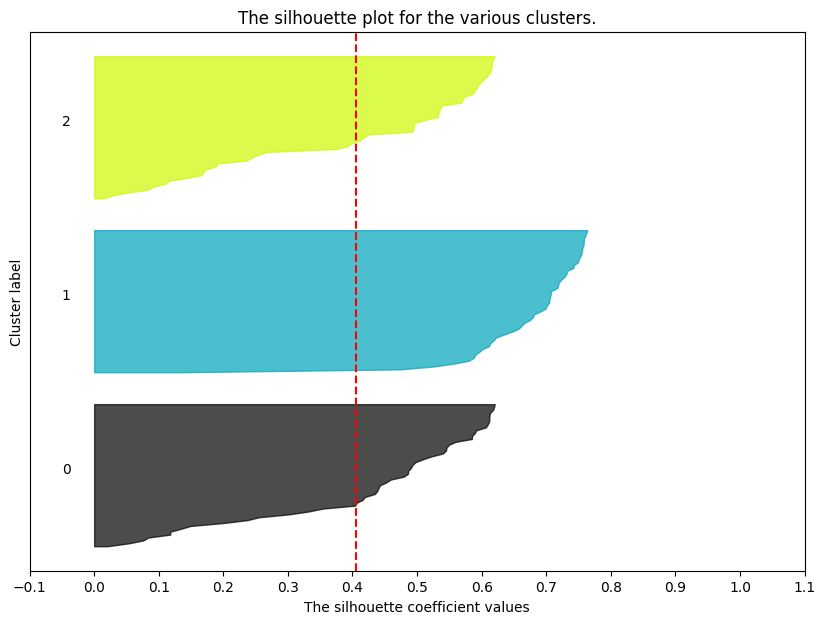

In [29]:
# 실루엣 차트 그리기
fig, ax1 = plt.subplots(figsize=(10, 7))
 
y_lower = 10
for i in range(3): #클러스터 3개
    ith_cluster_silhouette_values = sample_silhouette_values[labels_3 == i]
    ith_cluster_silhouette_values.sort()
   
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
 
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
 
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
    y_lower = y_upper + 10  # 다음 클러스터로 이동
 
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
 
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))
 
plt.show()